## PROBLEM STATEMENT

### Domain : Exploratory Data Analysis

#### Objective : Global Terrorism Analysis
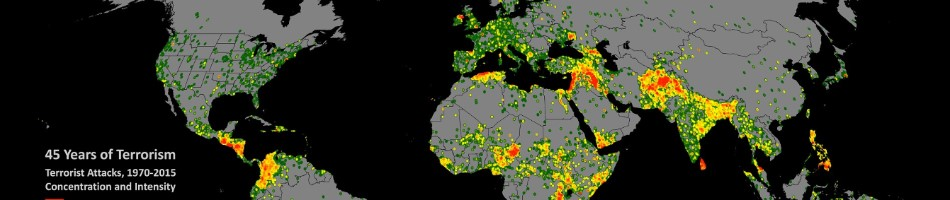


The aim of this analysis is to provide answers to the following questions:

- How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?
- How often the attack becomes a success?
- What are the most common methods of attacks? Does it differ in various regions or in time?
- Find out the hot zones of terrorism.
- What all security issues and insights you can derive by Exploratory Data Analysis?

#### About the dataset
The Dataset was extracted from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

###### Explanation of selected columns:
- success - Success of a terrorist strike
- suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
- attacktype1 - The general method of attack
- attacktype1_txt - The general method of attack and broad class of tactics used.
- targtype1_txt - The general type of target/victim
- targsubtype1_txt - The more specific target category
- target1 - The specific person, building, installation that was targeted and/or victimized
- natlty1_txt - The nationality of the target that was attacked
- gname - The name of the group that carried out the attack
- gsubname - Additional details about group that carried out the attack like fractions
- nperps - The total number of terrorists participating in the incident
- weaptype1_txt - General type of weapon used in the incident
- weapsubtype1_txt - More specific value for most of the Weapon Types
- nkill - The number of total confirmed fatalities for the incident
- nkillus - The number of U.S. citizens who died as a result of the incident


**Learning Outcome:**

                * Exploratory Data Analysis
                * Descriptive Statistics
                * Data Visualization
                * Preparing the data to train a model
                * Training and making predictions using an Ensemble Model
**Technical Stack:** numpy, pandas, matplotlib, seaborn, tableau Dasboard

**Author : Utkarsh Pratap Singh**



In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

C:\Users\utkar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# To determine the versions of the packages
print(pd.__version__)
print(sns.__version__)

2.0.2
0.11.2


In [3]:
# Reading the CSV DataSet using pandas read_csv() function
terr_df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
print("Data imported successfully \n \n");
print('The no. of rows is' ,terr_df.shape[0], 'and The no. of columns is', terr_df.shape[1],"\n\n")
print("Sample of the dataset :: \n \n ");
terr_df.head() # Printing top 5 rows of the dataframe

Data imported successfully 
 

The no. of rows is 181691 and The no. of columns is 135 


Sample of the dataset :: 
 
 


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Checking Datatypes using dtypes attribute for each columns
terr_df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [5]:
# changing the name of the necessary columns using rename() function
terr_df.rename(columns = {'eventid':'id', 'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
# Creating another DataFrame using the relevent Columns
terr = terr_df[['id', 'Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terr.head()

,id,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
# For Each columns lets check number of unique values
for i in terr.columns:
    print(f'{i:<15}{terr[i].nunique(): <10}')

id             181691    
Year           47        
Month          13        
Day            32        
Country        205       
State          2855      
Region         12        
city           36673     
latitude       48322     
longitude      48039     
Attack_type    9         
Killed         205       
Wounded        238       
Target         86005     
Summary        112492    
Group          3537      
Target_type    22        
Weapon_type    12        
Motive         14490     


In [8]:
# Count the NaN values in the DataFrame
terr.isnull().sum()

id                  0
Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              435
latitude         4556
longitude        4557
Attack_type         0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:

terr['State'].fillna(0,inplace=True)
terr['city'].fillna(0,inplace=True)
terr['latitude'].fillna(0,inplace=True)
terr['longitude'].fillna(0,inplace=True)
terr['Killed'].fillna(0,inplace=True)
terr['Wounded'].fillna(0,inplace=True)
terr['Target'].fillna(0,inplace=True)
terr['Summary'].fillna(0,inplace=True)
terr['Motive'].fillna(0,inplace=True) 
terr['Group'].fillna(0,inplace=True)
terr['Weapon_type'].fillna(0,inplace=True)  

In [10]:
terr.isnull().sum()

id             0
Year           0
Month          0
Day            0
Country        0
State          0
Region         0
city           0
latitude       0
longitude      0
Attack_type    0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

## Summery Statistics

In [11]:
terr[["Killed", "Wounded"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Killed,181691.0,2.266860,11.227057,0.0,0.0,0.0,2.0,1570.0
Wounded,181691.0,2.883296,34.309747,0.0,0.0,0.0,2.0,8191.0


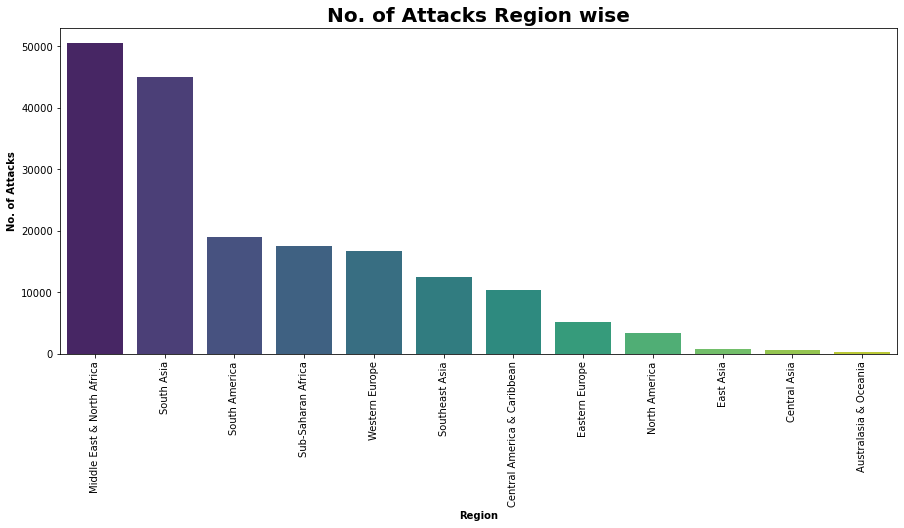

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(terr['Region'].value_counts().index,terr['Region'].value_counts().values, palette='viridis')
plt.title('No. of Attacks Region wise', fontsize = 20, fontweight="bold")
plt.xlabel('Region', fontweight="bold")
plt.ylabel('No. of Attacks', fontweight="bold")
plt.xticks(rotation= 90)
plt.show()


 
 Percentage of attack in each Attack types domain : 
 


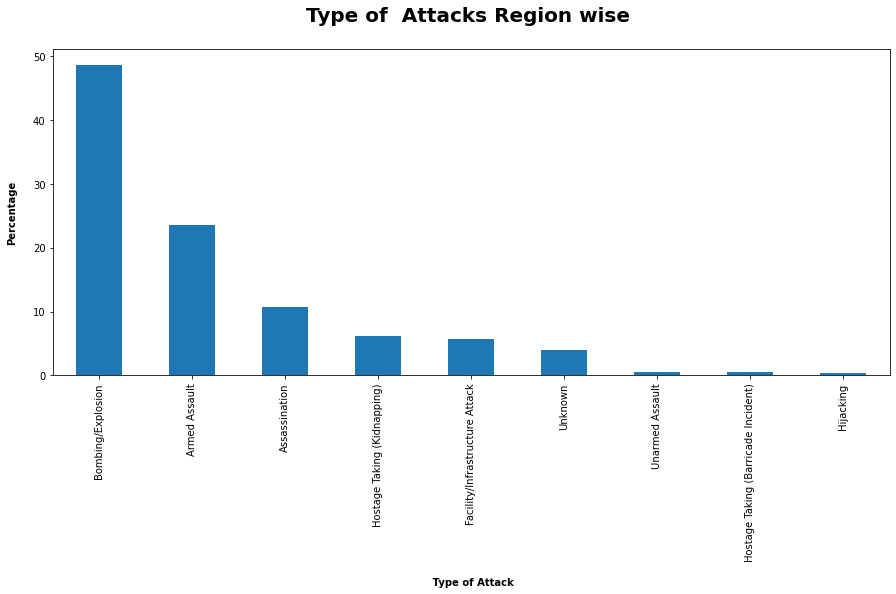

In [13]:
# Let us print the percentage of each attack types 
print("\n \n Percentage of attack in each Attack types domain : \n ")
atk_typ = ((terr['Attack_type'].value_counts()/terr.shape[0])*100)
plt.figure(figsize=(15,6))
atk_typ.plot.bar()
plt.title('Type of  Attacks Region wise \n', fontsize = 20, fontweight="bold")
plt.xlabel('\n Type of Attack', fontweight="bold")
plt.ylabel('Percentage\n', fontweight="bold")
plt.xticks(rotation= 90)
plt.show()

In [14]:
terr['Weapon_type'].shape[0]

181691

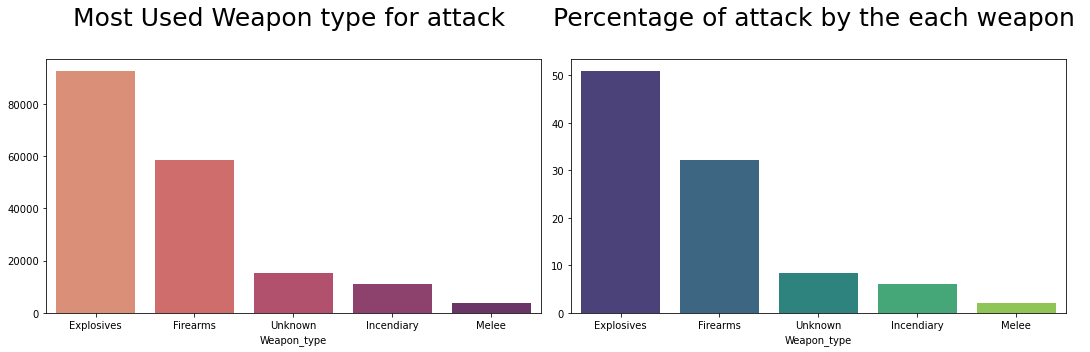

In [15]:
fig,axes = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
sns.barplot(terr['Weapon_type'].value_counts().head().index, terr['Weapon_type'].value_counts().head().values, palette='flare', ax=axes[0])
axes[0].set_title('Most Used Weapon type for attack \n', fontsize = 25)
sns.barplot(((terr['Weapon_type'].value_counts().head()/terr['Weapon_type'].shape[0])*100).index, ((terr['Weapon_type'].value_counts().head()/terr['Weapon_type'].shape[0])*100).values, palette='viridis', ax=axes[1])
axes[1].set_title('Percentage of attack by the each weapon \n',fontsize = 25)
fig.tight_layout()
plt.show()

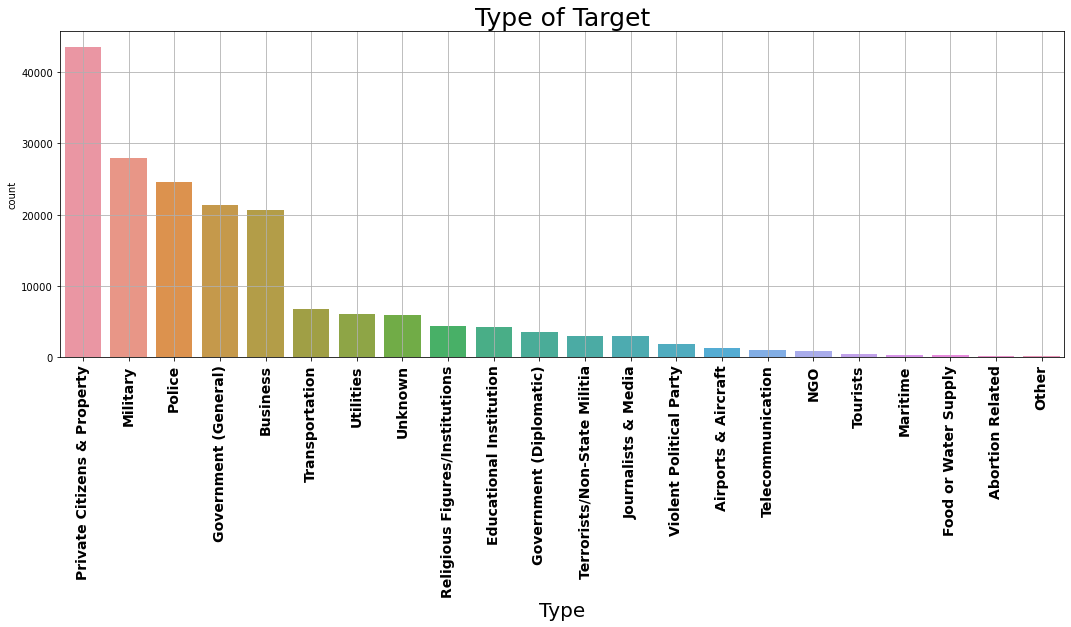

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(x = terr['Target_type'], order= terr['Target_type'].value_counts().index)
plt.xticks(rotation=90, fontweight = 'bold', fontsize = 14)
plt.xlabel('Type',fontsize = 20)
plt.title('Type of Target', fontsize = 25)
plt.grid()
plt.show()

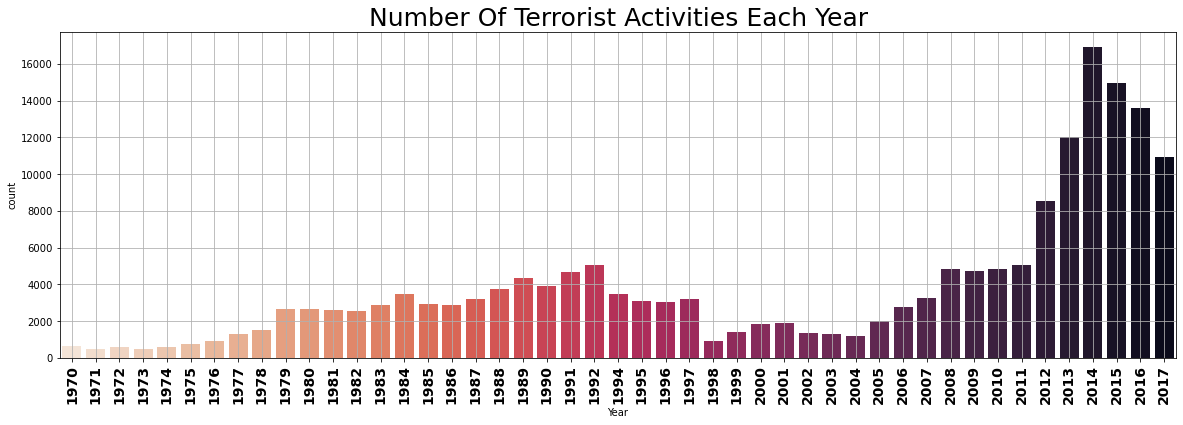

In [17]:
plt.subplots(figsize=(20,6))
sns.countplot('Year',data = terr, palette='rocket_r')
plt.xticks(rotation=90, fontweight = 'bold', fontsize = 14)
plt.title('Number Of Terrorist Activities Each Year', fontsize = 25)
plt.grid()
plt.show()

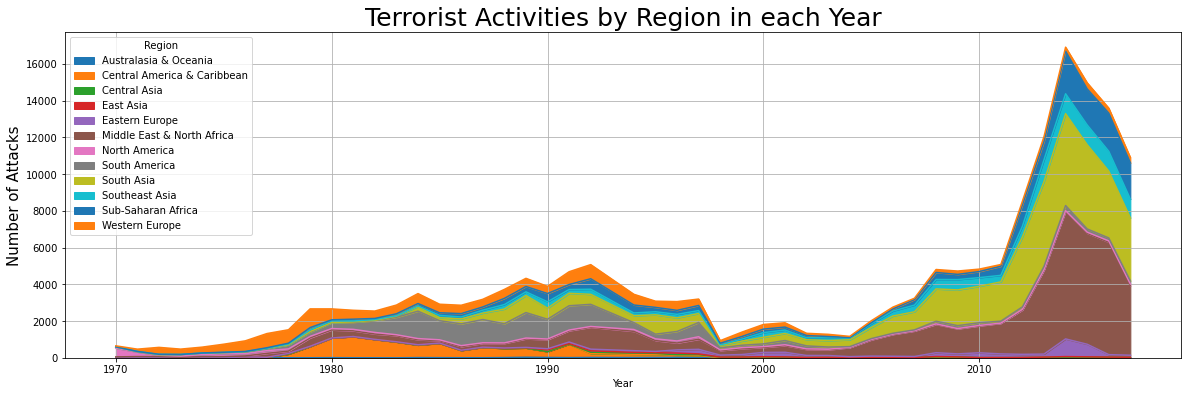

In [18]:
pd.crosstab(terr.Year, terr.Region).plot(kind='area',figsize=(20,6))
plt.title('Terrorist Activities by Region in each Year',fontsize = 25)
plt.ylabel('Number of Attacks',fontsize= 15)
plt.grid()
plt.show()

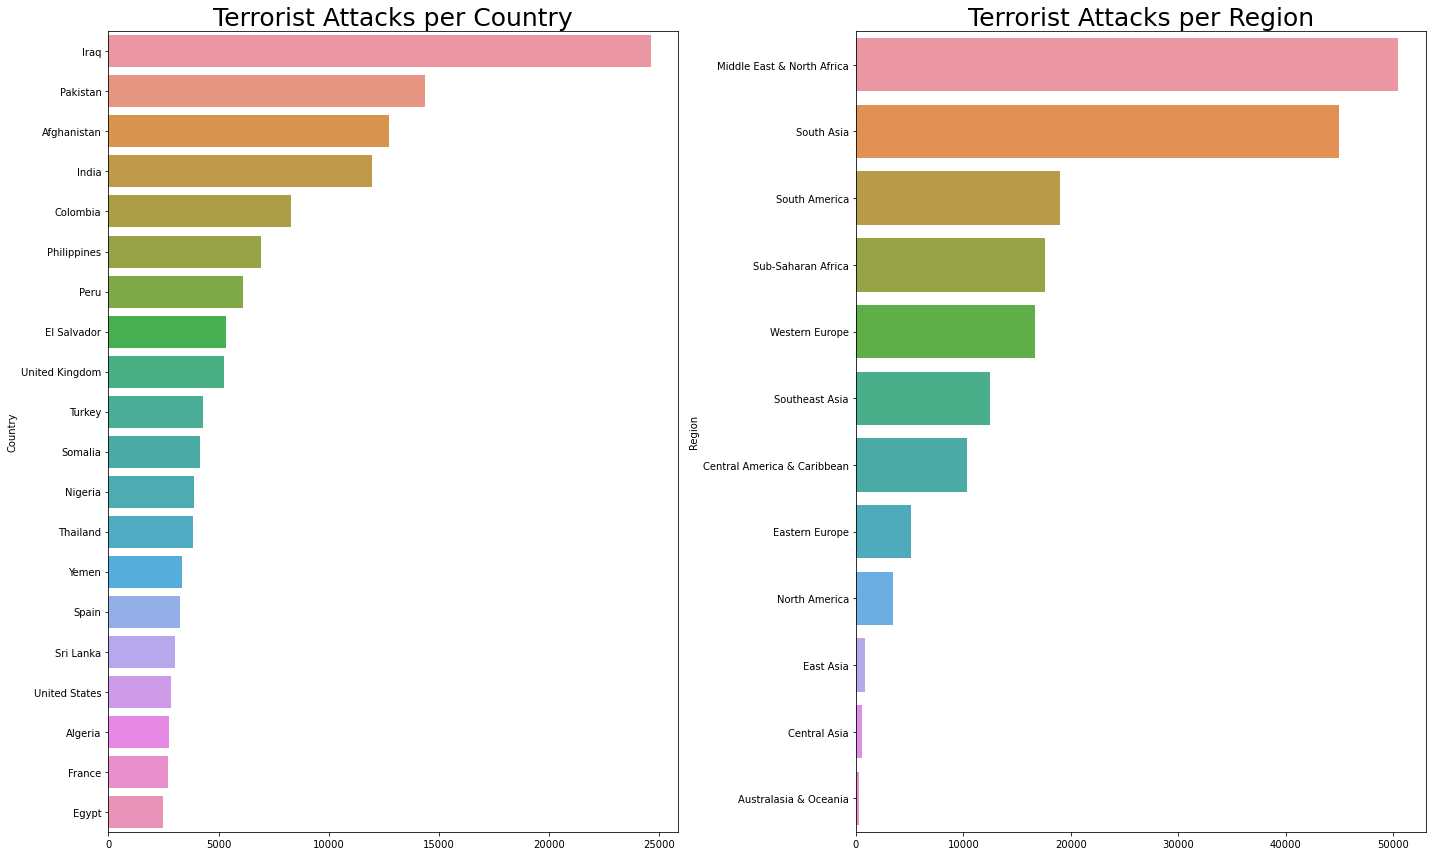

In [19]:
fig,axes = plt.subplots(figsize=(20,12),nrows=1,ncols=2)
sns.barplot(x = terr['Country'].value_counts()[:20].values, y = terr['Country'].value_counts()[:20].index, ax=axes[0]);
axes[0].set_title('Terrorist Attacks per Country', fontsize = 25)
sns.barplot(x=terr['Region'].value_counts().values, y=terr['Region'].value_counts().index, ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region',fontsize = 25)
fig.tight_layout()
plt.show()

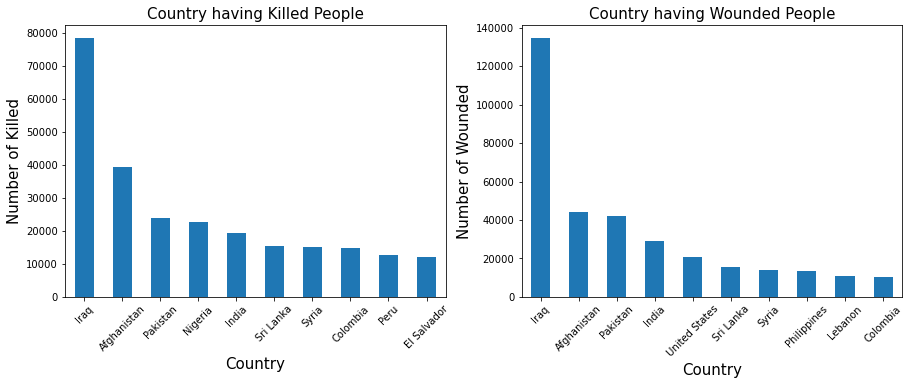

In [20]:
plt.subplot(1,2,2)

df1=terr.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,1)
terr.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15, 5)

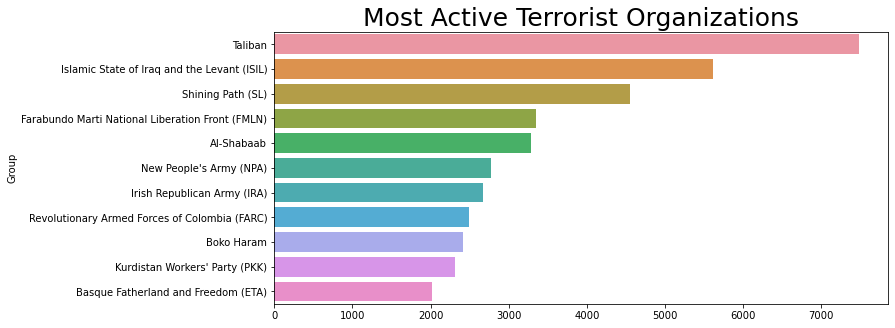

In [21]:
plt.subplots(figsize=(11,5))
sns.barplot(y=terr['Group'].value_counts()[1:12].index,x=terr['Group'].value_counts()[1:12].values)
plt.title('Most Active Terrorist Organizations', fontsize = 25)
plt.show()


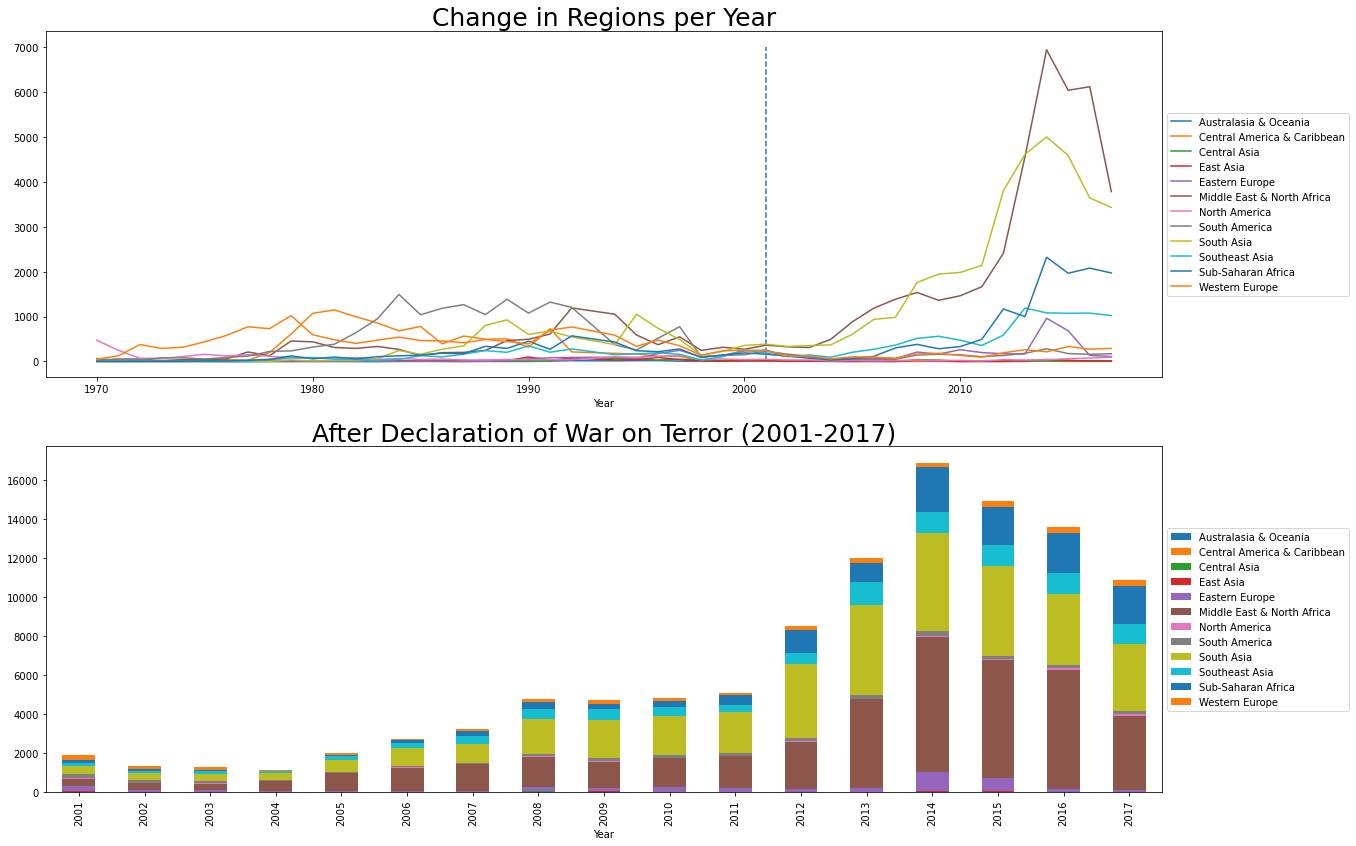

In [22]:
data_after = terr[terr['Year']>=2001]
fig,ax = plt.subplots(figsize=(20,14), nrows=2, ncols=1)
ax[0] = pd.crosstab(terr.Year, terr.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year', fontsize = 25)
ax[0].legend(loc='center left', bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001, ymin=0, ymax=7000, linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True, ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)',fontsize = 25)
ax[1].legend(loc='center left', bbox_to_anchor = (1,0.5))
plt.show()

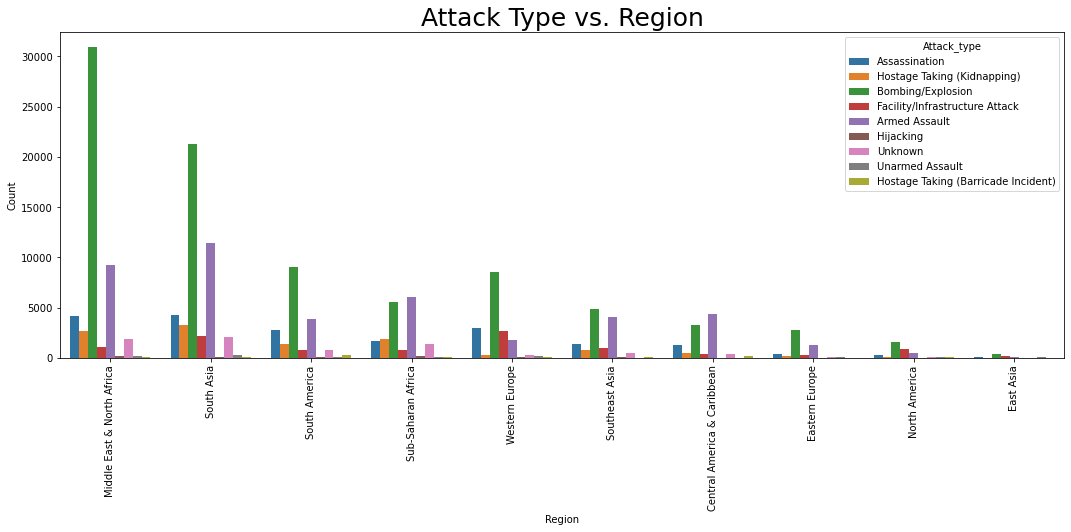

In [23]:
plt.subplots(figsize=(18,6))
sns.countplot(data=terr, x='Region',order=terr['Region'].value_counts().head(10).index, hue='Attack_type')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Attack Type vs. Region', fontsize = 25)
plt.show()

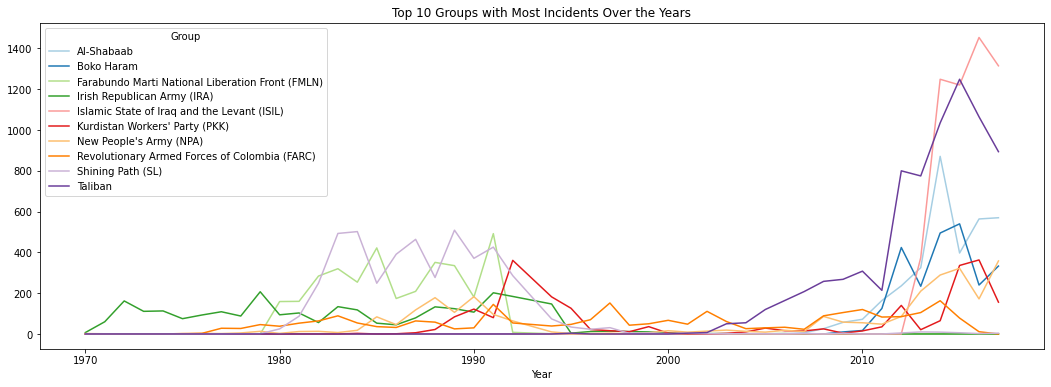

In [24]:
top_groups10=terr[terr['Group'].isin(terr['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Top 10 Groups with Most Incidents Over the Years')
plt.show()

### Regions Attacked By Terrorist Groups

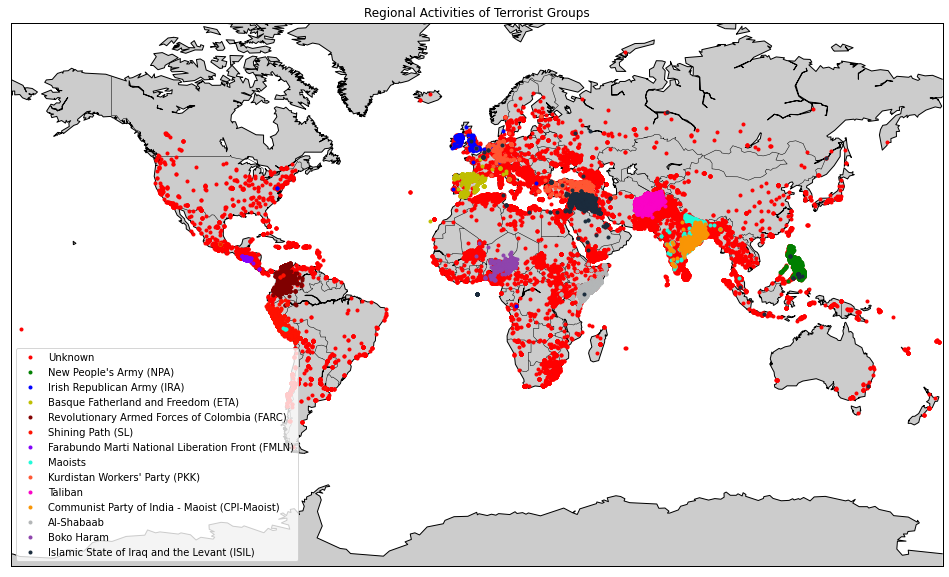

In [25]:
top_groups=terr[terr['Group'].isin(terr['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='#fff')
m4.drawmapboundary(fill_color='#fff')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

In [26]:
%%HTML
<div class='tableauPlaceholder' id='viz1647360823046' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismDataAnalysis_16364770272310&#47;Dashboard1&#47;1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
        <param name='embed_code_version' value='3' /> 
        <param name='site_root' value='' />
        <param name='name' value='TerrorismDataAnalysis_16364770272310&#47;Dashboard1' />
        <param name='tabs' value='yes' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismDataAnalysis_16364770272310&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
    </object>
</div>                
<script type='text/javascript'>   
var divElement = document.getElementById('viz1647360823046');                    
    var vizElement = divElement.getElementsByTagName('object')[0];                    
    if ( divElement.offsetWidth > 800 ) { 
        vizElement.style.width='100%';
        vizElement.style.height = (divElement.offsetWidth*0.75)+'px';
    } else if ( divElement.offsetWidth > 400 ) { 
        vizElement.style.width='100%';
        vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
    } else { 
        vizElement.style.width='100%';
        vizElement.style.minHeight='1350px';
        vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';
    }  
    var scriptElement = document.createElement('script');                    
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
    vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

## Terrorism In India

In [27]:
terr_India = terr[terr.Country == "India"]

In [28]:
terr_India

,id,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
1186,197202220004,1972,2,22,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,0,Palestinians,Airports & Aircraft,Explosives,0
2764,197501190004,1975,1,2,India,Bihar,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown
3857,197605260001,1976,5,26,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,0.0,0.0,New Delhi airport,0,Unknown,Airports & Aircraft,Explosives,0
5327,197709280004,1977,9,28,India,Maharashtra,South Asia,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,0,Japanese Red Army (JRA),Airports & Aircraft,Firearms,0
7337,197901130004,1979,1,13,India,Assam,South Asia,Unknown,26.200605,92.937574,Armed Assault,0.0,0.0,patrol,0,Naga People,Police,Firearms,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,12,30,India,Kerala,South Asia,Koothuparamba,11.831902,75.565432,Bombing/Explosion,0.0,0.0,Koothuparamba Police Station,12/30/2017: Assailants threw an explosive devi...,Unknown,Police,Explosives,"The specific motive is unknown; however, sourc..."
181665,201712300023,2017,12,30,India,Chhattisgarh,South Asia,Toylanka,18.802725,81.497666,Facility/Infrastructure Attack,0.0,0.0,Road Construction Site,12/30/2017: Assailants set fire to seven vehic...,Communist Party of India - Maoist (CPI-Maoist),Business,Firearms,"The specific motive is unknown; however, sourc..."
181672,201712310005,2017,12,31,India,Jammu and Kashmir,South Asia,Lethapora,33.966527,74.964225,Armed Assault,8.0,3.0,Camp,12/31/2017: Assailants armed with grenades and...,Jaish-e-Mohammad (JeM),Police,Explosives,"The specific motive is unknown; however, sourc..."
181684,201712310019,2017,12,31,India,Assam,South Asia,Hungrum,25.180162,93.015788,Hostage Taking (Kidnapping),0.0,0.0,Personal Security Officer of Council Member Ih...,12/31/2017: Assailants abducted Prafulla Phuka...,Zeliangrong United Front,Government (General),Firearms,0


In [29]:
terr_India.shape

(11960, 19)

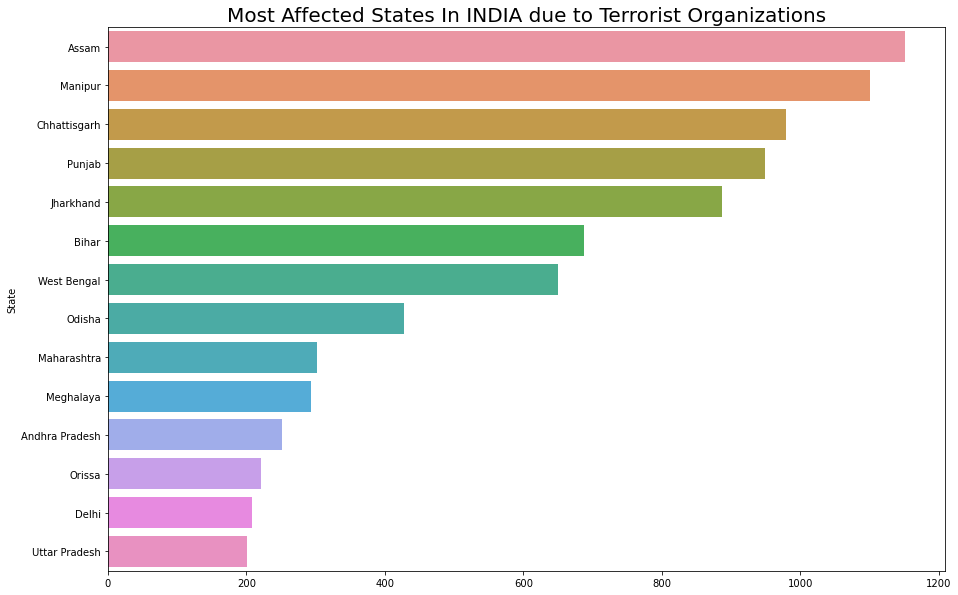

In [30]:
plt.subplots(figsize=(15,10))
sns.barplot(y=terr_India['State'].value_counts()[1:15].index,x=terr_India['State'].value_counts()[1:15].values)
plt.title('Most Affected States In INDIA due to Terrorist Organizations', fontsize = 20)
plt.show()

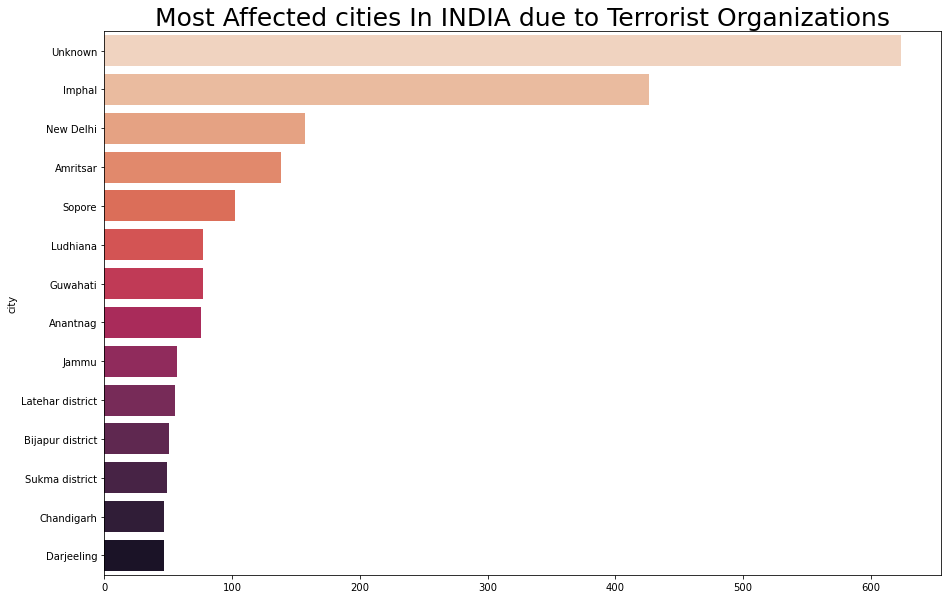

In [31]:
plt.subplots(figsize=(15,10))
sns.barplot(y=terr_India['city'].value_counts()[1:15].index,x=terr_India['city'].value_counts()[1:15].values,palette='rocket_r')
plt.title('Most Affected cities In INDIA due to Terrorist Organizations', fontsize = 25)
plt.show()

(6.0, 40.0)

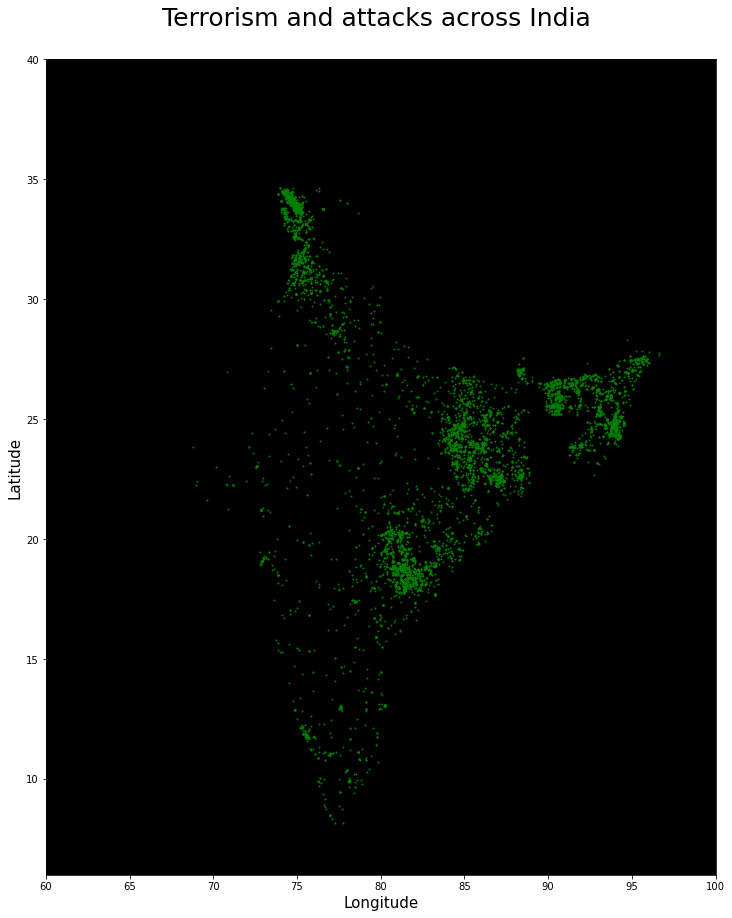

In [32]:
plt.figure(facecolor='white',figsize = (12,15))

# plot all data points on the map of New York
ax = plt.axes()
ax.set_facecolor('black')
plt.plot(terr_India['longitude'].values, terr_India['latitude'].values, 'go', ms = 0.9)
plt.title("Terrorism and attacks across India \n", fontsize=25)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude',fontsize = 15)

plt.xlim(60, 100)
plt.ylim(6, 40)

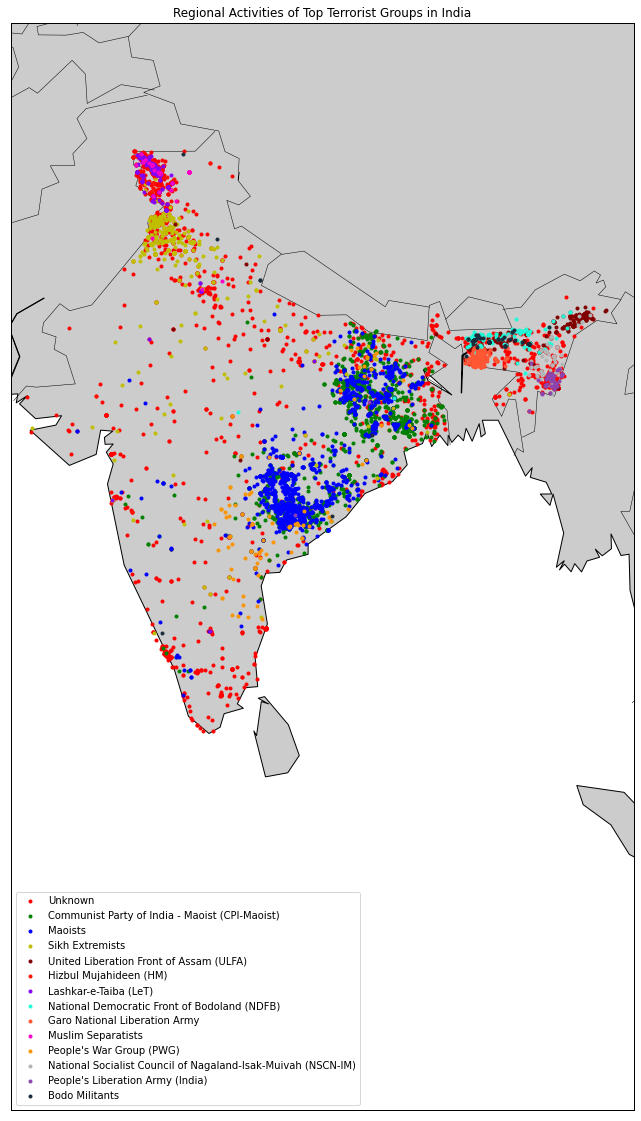

In [33]:
# Get the top 14 terrorist groups in India
top_groups = terr_India['Group'].value_counts().head(14).index

# Create a Basemap instance
m4 = Basemap(
    projection='mill',
    llcrnrlat=-10,
    urcrnrlat=40,
    llcrnrlon=68,
    urcrnrlon=98,
    resolution='c',
    lat_0=True,
    lat_1=True
)

# Customize the map
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='#fff')
m4.drawmapboundary(fill_color='#fff')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(80, 20)

# Define colors for plotting
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']

# Iterate through the top groups and plot their activities
for group, color in zip(top_groups, colors):
    group_data = terr_India[terr_India['Group'] == group]
    x_group, y_group = m4(group_data['longitude'].values, group_data['latitude'].values)
    m4.plot(x_group, y_group, 'go', markersize=3, color=color, label=group)

# Add legend
plt.legend(loc='lower left', frameon=True, prop={'size': 10})

# Set the plot title
plt.title('Regional Activities of Top Terrorist Groups in India')

# Show the plot
plt.show()

## Conclusion

After performing the Exploratory Data Analysis we get the following insights from the data:


* Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
* Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.
* Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
* The State and City that was most affected was Baghdad
* In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.
* The most common attack type was Bombing/Explosion.
* Explosives have been consistently the most popular weapon of choice for terrorists.
* Taliban became more active since 2012 and they are responsible for the most of the terror attacks
* Terrorist activities are more in Middle East and North Africa
* Attacks have increased from 2010 in Middle East and South Africa
* Terrorist Organizations have started using Airports And Aircraft and Military as their major target type since 2000's
* Middle East and North Africa seen to have places of serious attacks.
* Iraq, Afghanistan and Pakistan are the most damaged countries.

### Recomendations

* Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.
* More surveillance is required especially in the Middle East & North African Regions.
* Strict border policy should be implemented to prevent the movement of explosives between the regions.